In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plot(S, I, R, t, divide_by=1):
    # Dibujamos los datos de S(t), I(t) y R(t)
    fig, ax = plt.subplots()
    ax.plot(t, S / divide_by, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I / divide_by, 'r', alpha=0.5, lw=2, label='Infectado')
    ax.plot(t, R / divide_by, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
    ax.set_xlabel(r'Tiempo')
    ax.set_ylabel(r'Poblacion normalizada (%d)' %divide_by)
    legend = ax.legend()
    plt.show()

In [4]:

N = 47000000 
I0 = 10000
R0 = 0
 

S0 = N - I0 - R0
 
beta = 0.1 # contagio
gamma = 0.02 # recuperación
 
t = np.linspace(0, 365, 365)
 
y0 = S0, I0, R0

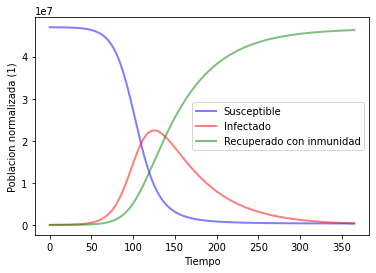

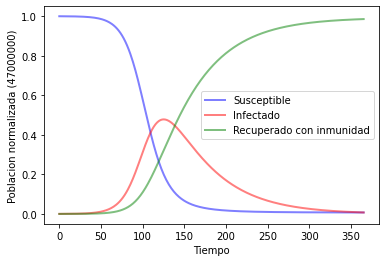

In [5]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
 
plot(S, I, R, t) # Datos sin normalizar
plot(S, I, R, t, divide_by=N) # Datos normalizados

Text(0.5, 1.0, 'Plano-fase')

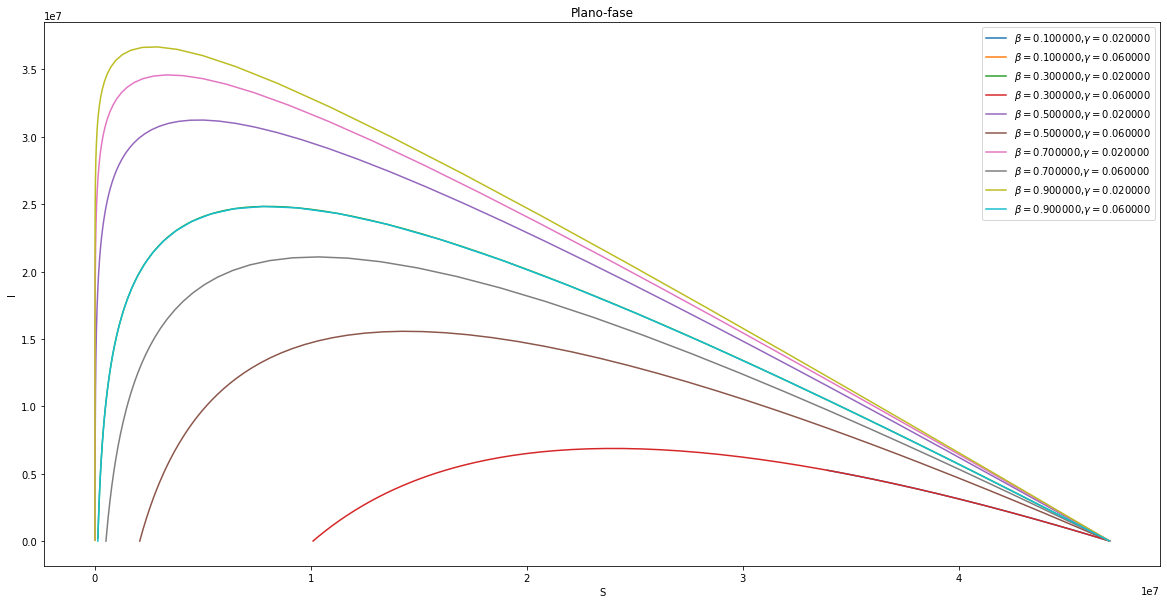

In [6]:
B=np.arange(0.1,1,0.2)
C=np.arange(0.02,0.1,0.04)
N=120000000.
plt.figure(figsize=(20,10))
for i in B:
    for j in C:
        ret = odeint(deriv, y0, t, args=(N, i, j))
        S, I, R = ret.T
        plt.plot(S,I,label=r'$\beta=$%f,$\gamma=$%f'%(i,j))
plt.xlabel('S')
plt.ylabel('I')
plt.legend(loc='upper right')  
plt.title('Plano-fase')

In [7]:
def plot_with_death_rate(S, I, R, t, divide_by=1, death_rate=0.05):
    # Dibujamos los datos de S(t), I(t) y R(t)
    fig, ax = plt.subplots()
    ax.plot(t, S / divide_by, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I / divide_by, 'r', alpha=0.5, lw=2, label='Infectado')
    RR = R * (1 - death_rate)
    DD = R - RR
    ax.plot(t, RR / divide_by, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
    ax.plot(t, DD / divide_by, 'k', alpha=0.5, lw=2, label='No recuperado')
    ax.set_xlabel(r'Tiempo')
    ax.set_ylabel(r'Poblacion normalizada (%d)' %divide_by)
    legend = ax.legend()
    plt.show()

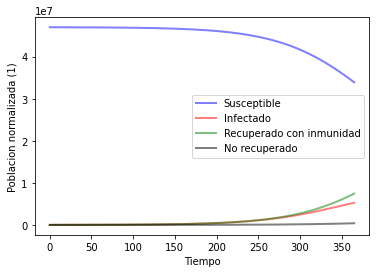

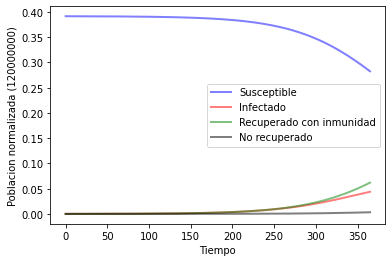

In [8]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
 
plot_with_death_rate(S, I, R, t) # Datos sin normalizar
plot_with_death_rate(S, I, R, t, divide_by=N) # Datos normalizados